# Analytics Academy of Data Corner


# Final Project Group A

Student Fullname:

Submission date:

In [1]:
#Importing the required libraries


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 100)

## *Step 1. Load the dataset (World)*

#### 1.1 Load the provided dataset file

In [2]:
dfRawData = pd.read_csv("covid-data.csv")

In [3]:
# *** Optional ***

# Export to Excel after step 1.1
dfRawData.to_excel("covid-data_Raw.xlsx")
print("file saved as covid-data_Raw.xlsx")

file saved as covid-data_Raw.xlsx


#### 1.2 Verify the dimensionality of the DataFrame

In [4]:
#  Verify the dimensionality of the DataFrame
dfRawData.shape

(166326, 67)

#### 1.2 List of columns of the DataFrame

In [5]:
# List of columns of the DataFrame

dfRawData.dtypes

iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

#### 1.3 Display the first 5 rows of the DataFrame

In [6]:
# The first 5 rows of the DataFrame
dfRawData.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## *Step 2. Choose the Data for the scope of our analysis  (World)*

#### 2.1 Copying a backup from rawdata and compare the dimensionality of the 2 DataFrames

In [7]:
#-- Copying a backup from rawdata
dfToClean = dfRawData

# Comparing the dimensionality of the 2 DataFrames
print('dfRawData ',dfRawData.shape)
print('dfToClean ',dfToClean.shape)

dfRawData  (166326, 67)
dfToClean  (166326, 67)


#### 2.2 Choosing the columns that are useful for the scope of our analysis

In [8]:
#-- Choosing the columns that are useful for the scope of our analysis
selected_col = [
    #Geography - Where and when
    'iso_code', 'continent', 'location', 'date',
    
    #Covid cases per million - How many
    'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million',
    
    #Economy and People
    'gdp_per_capita', 'population', 'population_density',
    
    #Medical Facilites
    'hospital_beds_per_thousand', 'life_expectancy'
]

In [9]:
# how many columns will we be using
print('In our analysis we will use ',len(selected_col),' out of ', len(dfRawData.columns),' Columns')

In our analysis we will use  13  out of  67  Columns


In [10]:
# Create the new dataframe with the chosen columns
dfToClean = dfRawData[selected_col]

In [11]:
# *** Optional ***

# Export to Excel after step 2.2
dfToClean.to_excel("covid-data_toClean_2-2.xlsx")
print("file saved as covid-data_toClean_2-2.xlsx")

file saved as covid-data_toClean_2-2.xlsx


#### 2.3 Verify the dimensionality of the new DataFrame

In [12]:
# Verify the dimensionality of the new DataFrame
# It should have the same 166326 rows but only 13 columns
dfToClean.shape

(166326, 13)

#### 2.4 List of columns of the new DataFrame

In [18]:
# List of columns of the DataFrame
dfToClean.dtypes

iso_code                              object
continent                             object
location                              object
date                          datetime64[ns]
total_cases                          float64
total_cases_per_million              float64
total_deaths                         float64
total_deaths_per_million             float64
gdp_per_capita                       float64
population                           float64
population_density                   float64
hospital_beds_per_thousand           float64
life_expectancy                      float64
dtype: object

#### 2.5 Change the data format

In [17]:
# Change the data format
dfToClean['date'] = pd.to_datetime(dfToClean['date'], format = '%Y-%m-%d')


C:\Users\K\AppData\Local\Temp\ipykernel_28716\2190555638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfToClean['date'] = pd.to_datetime(dfToClean['date'], format = '%Y-%m-%d')


#### 2.6 Display the first 5 rows of the new DataFrame

In [20]:
# The first 5 rows of the DataFrame
dfToClean.head(5)

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2020-02-24,5.0,0.126,NaN,NaN,1803.987,39835428.0,54.422,0.5,64.83
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.126,NaN,NaN,1803.987,39835428.0,54.422,0.5,64.83
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.126,NaN,NaN,1803.987,39835428.0,54.422,0.5,64.83
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.126,NaN,NaN,1803.987,39835428.0,54.422,0.5,64.83
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.126,NaN,NaN,1803.987,39835428.0,54.422,0.5,64.83


## *Step 3. Data Cleaning  (World)*

#### 3.1 Listing the columns with null values

In [21]:
# Listing the columns with null values

dfToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                          0
continent                      9956
location                          0
date                              0
total_cases                    3033
total_cases_per_million        3791
total_deaths                  20875
total_deaths_per_million      21620
gdp_per_capita                27822
population                     1075
population_density            18398
hospital_beds_per_thousand    42662
life_expectancy               11058
dtype: int64

####  3.2 Showing records with null values in 'continent'

In [22]:
# Showing records with 'continent' isnull

dfToClean[dfToClean['continent'].isnull()]

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
741,OWID_AFR,NaN,Africa,2020-02-13,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
742,OWID_AFR,NaN,Africa,2020-02-14,1.0,0.001,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
743,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.001,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
744,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.001,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
745,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.001,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164192,OWID_WRL,NaN,World,2022-03-01,438528632.0,55686.418,5964706.0,757.426,15469.207,7.874966e+09,58.045,2.705,72.58
164193,OWID_WRL,NaN,World,2022-03-02,440180084.0,55896.127,5972651.0,758.435,15469.207,7.874966e+09,58.045,2.705,72.58
164194,OWID_WRL,NaN,World,2022-03-03,442067549.0,56135.806,5981034.0,759.500,15469.207,7.874966e+09,58.045,2.705,72.58
164195,OWID_WRL,NaN,World,2022-03-04,443767689.0,56351.698,5989802.0,760.613,15469.207,7.874966e+09,58.045,2.705,72.58


 The listing shows several records with a iso-code starting with OWID. The records are not from individual countries are out of the scope or our analysis

#### 3.3 Showing records with 'iso_code' containing 'OWID'

In [23]:
# 'iso_code' contains 'OWID'

dfToClean[dfToClean['iso_code'].str.contains('OWID')]

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
741,OWID_AFR,NaN,Africa,2020-02-13,NaN,NaN,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
742,OWID_AFR,NaN,Africa,2020-02-14,1.0,0.001,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
743,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.001,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
744,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.001,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
745,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.001,NaN,NaN,NaN,1.373486e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164192,OWID_WRL,NaN,World,2022-03-01,438528632.0,55686.418,5964706.0,757.426,15469.207,7.874966e+09,58.045,2.705,72.58
164193,OWID_WRL,NaN,World,2022-03-02,440180084.0,55896.127,5972651.0,758.435,15469.207,7.874966e+09,58.045,2.705,72.58
164194,OWID_WRL,NaN,World,2022-03-03,442067549.0,56135.806,5981034.0,759.500,15469.207,7.874966e+09,58.045,2.705,72.58
164195,OWID_WRL,NaN,World,2022-03-04,443767689.0,56351.698,5989802.0,760.613,15469.207,7.874966e+09,58.045,2.705,72.58


#### 3.4 Removing records with 'iso_code' containing 'OWID'

In [24]:
# Remove the records with 'iso_code' containing 'OWID'
dfToClean = dfToClean[dfToClean["iso_code"].str.contains("OWID") == False]

In [25]:
# *** Optional ***

# Export to Excel after step 3.4
dfToClean.to_excel("covid-data_toClean_3-4.xlsx")
print("file saved as covid-data_toClean_3-4.xlsx")

file saved as covid-data_toClean_3-4.xlsx


 #### 3.5 Verify that all records with 'iso_code' containing 'OWID' were removed

In [26]:
# 'iso_code' contains 'OWID'
dfToClean[dfToClean['iso_code'].str.contains('OWID')]

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy


#### 3.6 Listing the columns with null values

In [27]:
# Listing the columns with null values

dfToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                          0
continent                         0
location                          0
date                              0
total_cases                    2709
total_cases_per_million        2709
total_deaths                  20336
total_deaths_per_million      20336
gdp_per_capita                18323
population                        0
population_density             8899
hospital_beds_per_thousand    32441
life_expectancy                 837
dtype: int64

#### 3.7 Showing records with null values in 'total_cases'

In [28]:
# 'total_cases' isnull

dfToClean[dfToClean['total_cases'].isnull()]

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
1493,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,11803.431,2872934.0,104.871,2.89,78.57
1494,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,11803.431,2872934.0,104.871,2.89,78.57
1495,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,11803.431,2872934.0,104.871,2.89,78.57
1496,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,11803.431,2872934.0,104.871,2.89,78.57
1497,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,11803.431,2872934.0,104.871,2.89,78.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154237,TUV,Oceania,Tuvalu,2021-10-18,NaN,NaN,NaN,NaN,3575.104,11925.0,373.067,NaN,67.57
154238,TUV,Oceania,Tuvalu,2021-10-19,NaN,NaN,NaN,NaN,3575.104,11925.0,373.067,NaN,67.57
154239,TUV,Oceania,Tuvalu,2021-10-20,NaN,NaN,NaN,NaN,3575.104,11925.0,373.067,NaN,67.57
154240,TUV,Oceania,Tuvalu,2021-10-21,NaN,NaN,NaN,NaN,3575.104,11925.0,373.067,NaN,67.57


As the dataset was imported froma csv file all blank cells were imported as null value 

#### 3.8 Replace null values with zero in 'total_cases'

In [29]:
# Replace NaN with zero in 'total_cases'
dfToClean['total_cases'] = dfToClean['total_cases'].replace(np.nan, 0)

# Replace NaN with zero in 'total_cases_per_million'
dfToClean['total_cases_per_million'] = dfToClean['total_cases_per_million'].replace(np.nan, 0)

# Replace NaN with zero in 'total_deaths'
dfToClean['total_deaths'] = dfToClean['total_deaths'].replace(np.nan, 0)

# Replace NaN with zero in 'total_deaths_per_million'
dfToClean['total_deaths_per_million'] = dfToClean['total_deaths_per_million'].replace(np.nan, 0)

In [30]:
# *** Optional ***

# Export to Excel after step 3.8
dfToClean.to_excel("covid-data_toClean_3-8.xlsx")
print("file saved as covid-data_toClean_3-8.xlsx")

file saved as covid-data_toClean_3-8.xlsx


#### 3.9 Listing the columns with null values

In [31]:
# Listing the columns with null values
dfToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                          0
continent                         0
location                          0
date                              0
total_cases                       0
total_cases_per_million           0
total_deaths                      0
total_deaths_per_million          0
gdp_per_capita                18323
population                        0
population_density             8899
hospital_beds_per_thousand    32441
life_expectancy                 837
dtype: int64

#### 3.10 Showing records with null values in 'gdp_per_capita'

In [32]:
# 'gdp_per_capita' isnull

dfToClean[dfToClean['gdp_per_capita'].isnull()]

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
2973,AND,Europe,Andorra,2020-03-02,1.0,12.928,0.0,0.000,NaN,77354.0,163.755,NaN,83.73
2974,AND,Europe,Andorra,2020-03-03,1.0,12.928,0.0,0.000,NaN,77354.0,163.755,NaN,83.73
2975,AND,Europe,Andorra,2020-03-04,1.0,12.928,0.0,0.000,NaN,77354.0,163.755,NaN,83.73
2976,AND,Europe,Andorra,2020-03-05,1.0,12.928,0.0,0.000,NaN,77354.0,163.755,NaN,83.73
2977,AND,Europe,Andorra,2020-03-06,1.0,12.928,0.0,0.000,NaN,77354.0,163.755,NaN,83.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163418,WLF,Oceania,Wallis and Futuna,2022-03-01,454.0,40923.021,7.0,630.972,NaN,11094.0,NaN,NaN,79.94
163419,WLF,Oceania,Wallis and Futuna,2022-03-02,454.0,40923.021,7.0,630.972,NaN,11094.0,NaN,NaN,79.94
163420,WLF,Oceania,Wallis and Futuna,2022-03-03,454.0,40923.021,7.0,630.972,NaN,11094.0,NaN,NaN,79.94
163421,WLF,Oceania,Wallis and Futuna,2022-03-04,454.0,40923.021,7.0,630.972,NaN,11094.0,NaN,NaN,79.94


The gdp_per_capita values are missing and value cannot be replaced with zero

We will start by listing all the countries where gdp_per_capita isnull

#### 3.11 List the locations where 'gdp_per_capita' isnull

In [33]:
# create a new dataframe where all records where 'gdp_per_capita' isnull
gdpIsNull = dfToClean[dfToClean['gdp_per_capita'].isnull()]

# Remove records where 'location' have duplicate values, keep the first one
gdpIsNull = gdpIsNull.drop_duplicates(subset='location', keep='first')

# List of 'location' with missing 'gdp_per_capita'
gdpIsNull

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
2973,AND,Europe,Andorra,2020-03-02,1.0,12.928,0.0,0.0,NaN,77354.0,163.755,NaN,83.73
4423,AIA,North America,Anguilla,2020-03-28,2.0,132.231,0.0,0.0,NaN,15125.0,NaN,NaN,81.88
19169,BES,North America,Bonaire Sint Eustatius and Saba,2020-04-02,2.0,75.629,0.0,0.0,NaN,26445.0,NaN,NaN,77.79
22048,VGB,North America,British Virgin Islands,2020-03-28,2.0,65.740,0.0,0.0,NaN,30423.0,207.973,NaN,79.07
34433,COK,Oceania,Cook Islands,2021-05-21,1.0,56.909,0.0,0.0,NaN,17572.0,NaN,NaN,76.25
36917,CUB,North America,Cuba,2020-03-12,3.0,0.265,0.0,0.0,NaN,11317498.0,110.408,5.200,78.80
37641,CUW,North America,Curacao,2020-03-14,1.0,6.068,0.0,0.0,NaN,164796.0,362.644,NaN,78.88
50873,FRO,Europe,Faeroe Islands,2020-03-04,1.0,20.386,0.0,0.0,NaN,49053.0,35.308,NaN,80.67
51605,FLK,South America,Falkland Islands,2020-04-04,1.0,283.447,0.0,0.0,NaN,3528.0,NaN,NaN,81.44
54611,PYF,Oceania,French Polynesia,2020-03-13,3.0,10.618,0.0,0.0,NaN,282534.0,77.324,NaN,77.66


 #### 3.12 Replace null values in 'gdp_per_capita' for locations classified as independent countries

We will manually update each value as there is no table to load and do it automatically

In [34]:
# Andorra gdp_per_capita to be replaced by 49900 according to CIA World Factbook,
# accessed in 16/07/2022
# https://www.cia.gov/the-world-factbook/countries/andorra/

dfToClean['gdp_per_capita'] = np.where((dfToClean['location'] == 'Andorra'), 49900, dfToClean['gdp_per_capita'])

In [35]:
# Cuba gdp_per_capita to be replaced by 21016.65 according to Trading Economics,
# accessed in 16/07/2022
# https://tradingeconomics.com/andorra/gdp-per-capita-ppp

dfToClean['gdp_per_capita'] = np.where((dfToClean['location'] == 'Cuba'), 21016.65, dfToClean['gdp_per_capita'])

In [36]:
# Liechtenstein gdp_per_capita to be replaced by 139100 according to CIA World Factbook,
# accessed in 16/07/2022
# https://www.cia.gov/the-world-factbook/countries/liechtenstein/

dfToClean['gdp_per_capita'] = np.where((dfToClean['location'] == 'Liechtenstein'), 139100, dfToClean['gdp_per_capita'])

In [37]:
# Monaco gdp_per_capita to be replaced by 115700 according to CIA World Factbook,
# accessed in 16/07/2022
# https://www.cia.gov/the-world-factbook/countries/monaco/

dfToClean['gdp_per_capita'] = np.where((dfToClean['location'] == 'Monaco'), 115700, dfToClean['gdp_per_capita'])

In [38]:
# Somalia gdp_per_capita to be replaced by 1302.45 according to Trading Economics,
# accessed in 16/07/2022
# https://tradingeconomics.com/somalia/gdp-per-capita-ppp

dfToClean['gdp_per_capita'] = np.where((dfToClean['location'] == 'Somalia'), 1302.45, dfToClean['gdp_per_capita'])

In [39]:
# Syria gdp_per_capita to be replaced by 4684.72 according to Trading Economics,
# accessed in 16/07/2022
# https://tradingeconomics.com/syria/gdp-per-capita-ppp

dfToClean['gdp_per_capita'] = np.where((dfToClean['location'] == 'Syria'), 4684.72, dfToClean['gdp_per_capita'])

In [40]:
# Taiwan gdp_per_capita to be replaced by 24502 according to CIA World Factbook,
# accessed in 16/07/2022
# https://www.cia.gov/the-world-factbook/countries/taiwan/

dfToClean['gdp_per_capita'] = np.where((dfToClean['location'] == 'Taiwan'), 24502, dfToClean['gdp_per_capita'])

#### 3.13 Remove records with null values in 'gdp_per_capita' for locations not classified as independent countries

In [41]:
# Remove the records where 'gdp_per_capita' isnull
# calculated loss of population data = 1289128
dfToClean = dfToClean.dropna(subset=['gdp_per_capita'])

In [42]:
# *** Optional ***

# Export to Excel after step 3.13
dfToClean.to_excel("covid-data_toClean_3-13.xlsx")
print("file saved as covid-data_toClean_3-13.xlsx")

file saved as covid-data_toClean_3-13.xlsx


#### 3.14 Listing the columns with null values

In [43]:
# Listing the columns with null values
dfToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                          0
continent                         0
location                          0
date                              0
total_cases                       0
total_cases_per_million           0
total_deaths                      0
total_deaths_per_million          0
gdp_per_capita                    0
population                        0
population_density             2194
hospital_beds_per_thousand    19258
life_expectancy                   0
dtype: int64

#### 3.15 Showing records with null values in 'population_density'

In [44]:
# 'population_density' isnull

dfToClean[dfToClean['population_density'].isnull()]

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
140251,SSD,Africa,South Sudan,2020-04-05,1.0,0.088,0.0,0.000,1569.888,11381377.0,NaN,NaN,57.85
140252,SSD,Africa,South Sudan,2020-04-06,1.0,0.088,0.0,0.000,1569.888,11381377.0,NaN,NaN,57.85
140253,SSD,Africa,South Sudan,2020-04-07,2.0,0.176,0.0,0.000,1569.888,11381377.0,NaN,NaN,57.85
140254,SSD,Africa,South Sudan,2020-04-08,2.0,0.176,0.0,0.000,1569.888,11381377.0,NaN,NaN,57.85
140255,SSD,Africa,South Sudan,2020-04-09,3.0,0.264,0.0,0.000,1569.888,11381377.0,NaN,NaN,57.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146922,TWN,Asia,Taiwan,2022-03-01,20533.0,860.742,853.0,35.758,24502.000,23855008.0,NaN,NaN,80.46
146923,TWN,Asia,Taiwan,2022-03-02,20582.0,862.796,853.0,35.758,24502.000,23855008.0,NaN,NaN,80.46
146924,TWN,Asia,Taiwan,2022-03-03,20653.0,865.772,853.0,35.758,24502.000,23855008.0,NaN,NaN,80.46
146925,TWN,Asia,Taiwan,2022-03-04,20717.0,868.455,853.0,35.758,24502.000,23855008.0,NaN,NaN,80.46


#### 3.16 List the locations where 'population_density' isnull

In [45]:
# create a new dataframe where all records where 'population_density' isnull
popDensIsNull = dfToClean[dfToClean['population_density'].isnull()]

# Remove records where 'location' have duplicate values, keep the first one
popDensIsNull = popDensIsNull.drop_duplicates(subset='location', keep='first')

popDensIsNull

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
140251,SSD,Africa,South Sudan,2020-04-05,1.0,0.088,0.0,0.0,1569.888,11381377.0,NaN,NaN,57.85
145433,SYR,Asia,Syria,2020-03-22,1.0,0.055,0.0,0.0,4684.720,18275704.0,NaN,1.5,72.70
146147,TWN,Asia,Taiwan,2020-01-16,0.0,0.000,0.0,0.0,24502.000,23855008.0,NaN,NaN,80.46


#### 3.17 Replace null values in 'population_density'

We will manually update each value as there is no table to load and do it automatically

In [46]:
# South Sudan population_density to be replaced by 18 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/EN.POP.DNST?locations=SS

dfToClean['population_density'] = np.where((dfToClean['location'] == 'South Sudan'), 18, dfToClean['population_density'])

In [47]:
# Syria population_density to be replaced by 100 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/EN.POP.DNST?locations=SY

dfToClean['population_density'] = np.where((dfToClean['location'] == 'Syria'), 100, dfToClean['population_density'])

In [48]:
# Taiwan population_density to be replaced by 673 according to Worldometer,
# accessed in 16/07/2022
# https://www.worldometers.info/world-population/taiwan-population/

dfToClean['population_density'] = np.where((dfToClean['location'] == 'Taiwan'), 673, dfToClean['population_density'])

In [49]:
# *** Optional ***

# Export to Excel after step 3.17
dfToClean.to_excel("covid-data_toClean_3-17.xlsx")
print("file saved as covid-data_toClean_3-17.xlsx")

file saved as covid-data_toClean_3-17.xlsx


#### 3.18 Listing the columns with null values

In [50]:
# Listing the columns with null values
dfToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                          0
continent                         0
location                          0
date                              0
total_cases                       0
total_cases_per_million           0
total_deaths                      0
total_deaths_per_million          0
gdp_per_capita                    0
population                        0
population_density                0
hospital_beds_per_thousand    19258
life_expectancy                   0
dtype: int64

#### 3.19 List the locations where 'hospital_beds_per_thousand' isnull

In [51]:
# create a new dataframe where all records where 'population_density' isnull
hospBedsIsNull = dfToClean[dfToClean['hospital_beds_per_thousand'].isnull()]

# Remove records where 'location' have duplicate values, keep the first one
hospBedsIsNull = hospBedsIsNull.drop_duplicates(subset='location', keep='first')

hospBedsIsNull

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
2973,AND,Europe,Andorra,2020-03-02,1.0,12.928,0.0,0.0,49900.000,77354.0,163.755,NaN,83.73
3707,AGO,Africa,Angola,2020-03-20,1.0,0.029,0.0,0.0,5819.495,33933611.0,23.890,NaN,61.15
7411,ABW,North America,Aruba,2020-03-13,2.0,18.658,0.0,0.0,35973.781,107195.0,584.800,NaN,76.29
16997,BMU,North America,Bermuda,2020-03-19,2.0,32.210,0.0,0.0,50669.315,62092.0,1308.820,NaN,82.59
28630,CYM,North America,Cayman Islands,2020-03-13,1.0,15.038,0.0,0.0,49903.029,66498.0,256.496,NaN,83.92
30074,TCD,Africa,Chad,2020-03-19,1.0,0.059,0.0,0.0,1768.153,16914985.0,11.833,NaN,54.24
33712,COG,Africa,Congo,2020-03-15,1.0,0.177,0.0,0.0,4881.406,5657017.0,15.405,NaN,64.57
35452,CIV,Africa,Cote d'Ivoire,2020-03-11,1.0,0.037,0.0,0.0,3601.006,27053629.0,76.399,NaN,57.78
39826,COD,Africa,Democratic Republic of Congo,2020-03-11,1.0,0.011,0.0,0.0,808.133,92377986.0,35.879,NaN,60.68
63785,GNB,Africa,Guinea-Bissau,2020-03-25,2.0,0.992,0.0,0.0,1548.675,2015490.0,66.191,NaN,58.32


In [52]:
# *** Optional ***

# Export to Excel after step 3.20
hospBedsIsNull.to_excel("hospBedsIsNull.xlsx")
print("file saved as hospBedsIsNull.xlsx")

file saved as hospBedsIsNull.xlsx


#### 3.20 Replace null values in 'hospital_beds_per_thousand'

We will manually update each value as there is no table to load and do it automatically

In [53]:
# Andorra hospital_beds_per_thousand to be replaced by 2.5 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=AD

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Andorra'), 2.5, dfToClean['hospital_beds_per_thousand'])

In [54]:
# Angola hospital_beds_per_thousand to be replaced by 0.8 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=AO

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Angola'), 0.8, dfToClean['hospital_beds_per_thousand'])

In [55]:
# Chad hospital_beds_per_thousand to be replaced by 0.4 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=TD

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Chad'), 0.4, dfToClean['hospital_beds_per_thousand'])

In [56]:
# Congo hospital_beds_per_thousand to be replaced by 1.6 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=CG

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Congo'), 1.6, dfToClean['hospital_beds_per_thousand'])

In [57]:
# "Cote d'Ivoire" hospital_beds_per_thousand to be replaced by 0.4 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=CI

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == "Cote d'Ivoire"), 0.4, dfToClean['hospital_beds_per_thousand'])

In [58]:
# Democratic Republic of Congo hospital_beds_per_thousand to be replaced by 0.8 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=CD

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Democratic Republic of Congo'), 0.8, dfToClean['hospital_beds_per_thousand'])

In [59]:
# Guinea-Bissau hospital_beds_per_thousand to be replaced by 1 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=GW

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Guinea-Bissau'), 1, dfToClean['hospital_beds_per_thousand'])

In [60]:
# Lesotho hospital_beds_per_thousand to be replaced by 1.3 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=LS

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Lesotho'), 1.3, dfToClean['hospital_beds_per_thousand'])

In [61]:
# Maldives hospital_beds_per_thousand to be replaced by 4.3 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=BM-MV

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Maldives'), 4.3, dfToClean['hospital_beds_per_thousand'])

In [62]:
# Mauritania hospital_beds_per_thousand to be replaced by 0.4 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=MR

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Mauritania'), 0.4, dfToClean['hospital_beds_per_thousand'])

In [63]:
# Micronesia (country) hospital_beds_per_thousand to be replaced by 3.2 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=FM

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Micronesia (country)'), 3.2, dfToClean['hospital_beds_per_thousand'])

In [64]:
# Namibia (country) hospital_beds_per_thousand to be replaced by 2.7 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=NA

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Namibia'), 2.7, dfToClean['hospital_beds_per_thousand'])

In [65]:
# Nigeria (country) hospital_beds_per_thousand to be replaced by 0.5 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=NG

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Nigeria'), 0.5, dfToClean['hospital_beds_per_thousand'])

In [66]:
# Papua New Guinea hospital_beds_per_thousand to be replaced by 4 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=PG

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Papua New Guinea'), 4, dfToClean['hospital_beds_per_thousand'])

In [67]:
# Rwanda hospital_beds_per_thousand to be replaced by 1.6 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=RW

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Rwanda'), 1.6, dfToClean['hospital_beds_per_thousand'])

In [68]:
# Samoa hospital_beds_per_thousand to be replaced by 1 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=WS

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Samoa'), 1, dfToClean['hospital_beds_per_thousand'])

In [69]:
# Senegal hospital_beds_per_thousand to be replaced by 0.3 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=SN

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Senegal'), 0.3, dfToClean['hospital_beds_per_thousand'])

In [70]:
# Sierra Leone hospital_beds_per_thousand to be replaced by 0.4 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=SL

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Sierra Leone'), 0.4, dfToClean['hospital_beds_per_thousand'])

In [71]:
# Tuvalu hospital_beds_per_thousand to be replaced by 5.6 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=TV

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Tuvalu'), 5.6, dfToClean['hospital_beds_per_thousand'])

In [72]:
# Vanuatu hospital_beds_per_thousand to be replaced by 1.7 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=VU

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Vanuatu'), 1.7, dfToClean['hospital_beds_per_thousand'])

In [73]:
# Hong Kong hospital_beds_per_thousand to be replaced by 4.9 according to The World Bank,
# accessed in 16/07/2022
# https://data.worldbank.org/indicator/SH.MED.BEDS.ZS?locations=HK

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Hong Kong'), 4.9, dfToClean['hospital_beds_per_thousand'])

In [74]:
# Macao hospital_beds_per_thousand to be replaced by 5.3 according to WorldData.info,
# accessed in 16/07/2022
# https://www.worlddata.info/asia/macao/health.php

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Macao'), 5.3, dfToClean['hospital_beds_per_thousand'])

In [75]:
# Palestine hospital_beds_per_thousand to be replaced by 1.2 according to fanack.com,
# accessed in 16/07/2022
# https://fanack.com/palestine/politics-of-palestine/the-health-sector-in-palestine/

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Palestine'), 1.2, dfToClean['hospital_beds_per_thousand'])

In [76]:
# South Sudan hospital_beds_per_thousand to be replaced by 0.74 according to Trading Economics,
# accessed in 16/07/2022
# https://tradingeconomics.com/sudan/hospital-beds-per-1-000-people-wb-data.html

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'South Sudan'), 0.74, dfToClean['hospital_beds_per_thousand'])

In [77]:
# Taiwan hospital_beds_per_thousand to be replaced by 5.7 according to PWC,
# accessed in 16/07/2022
# https://www.pwc.tw/en/publications/assets/taiwan-health-industries.pdf

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Taiwan'), 5.7, dfToClean['hospital_beds_per_thousand'])

In [78]:
# Bermuda hospital_beds_per_thousand to be replaced by 6.3 according to WorldData.info,
# accessed in 16/07/2022
# https://www.worlddata.info/america/bermuda/health.php

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Bermuda'), 6.3, dfToClean['hospital_beds_per_thousand'])

In [79]:
# Cayman Islands hospital_beds_per_thousand to be replaced by 3 according to WorldData.info,
# accessed in 16/07/2022
# https://www.worlddata.info/america/cayman-islands/health.php

dfToClean['hospital_beds_per_thousand'] = np.where((dfToClean['location'] == 'Cayman Islands'), 3, dfToClean['hospital_beds_per_thousand'])

#### 3.21 Remove records with null values in 'hospital_beds_per_thousand' for the remaining locations 

In [80]:
# Remove the records where 'hospital_beds_per_thousand
# calculated loss of population data = 150616
dfToClean = dfToClean.dropna(subset=['hospital_beds_per_thousand'])

In [81]:
# *** Optional ***

# Export to Excel after step 3.21
dfToClean.to_excel("covid-data_toClean_3-21.xlsx")
print("file saved as covid-data_toClean_3-21.xlsx")

file saved as covid-data_toClean_3-21.xlsx


#### 3.22 Listing the columns with null values

In [82]:
# Listing the columns with null values
dfToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                      0
continent                     0
location                      0
date                          0
total_cases                   0
total_cases_per_million       0
total_deaths                  0
total_deaths_per_million      0
gdp_per_capita                0
population                    0
population_density            0
hospital_beds_per_thousand    0
life_expectancy               0
dtype: int64

#### 3.23 Check for duplicates

In [83]:
# Copy data to a new dataframe and check for duplicates
duplicate = dfToClean[dfToClean.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy


In [84]:
duplicate.shape

(0, 13)

#### 3.24 Check for Outliers

In [85]:
dfToClean.describe()

,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
count,1.411300e+05,141130.000000,141130.000000,141130.000000,141130.000000,1.411300e+05,141130.000000,141130.000000,141130.000000
mean,6.995308e+05,28341.368170,14208.632417,451.435730,20741.584535,4.189247e+07,461.881418,2.925717,73.115847
std,3.332693e+06,50641.416283,58165.774583,767.965459,23334.161775,1.524558e+08,2183.108269,2.407491,7.649380
min,0.000000e+00,0.000000,0.000000,0.000000,661.240000,1.087300e+04,1.980000,0.100000,53.280000
25%,2.728000e+03,513.592500,42.000000,7.853000,4449.898000,2.159067e+06,36.253000,1.200000,67.440000
50%,2.984200e+04,4188.705000,502.000000,72.275000,13111.214000,9.291000e+06,87.176000,2.300000,74.480000
75%,2.685572e+05,35525.021000,4779.000000,581.969000,27936.896000,3.049064e+07,212.865000,4.000000,78.730000
max,7.926573e+07,496858.598000,958437.000000,6322.263000,139100.000000,1.444216e+09,20546.766000,13.800000,86.750000


 We consider that the data is clean and suitable for analysis

#### 3.25 We now have clean data

In [86]:
# copy the clean data to a new DataFrame
dfClean = dfToClean

In [87]:
# concise summary of the DataFrame 
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141130 entries, 0 to 166325
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iso_code                    141130 non-null  object        
 1   continent                   141130 non-null  object        
 2   location                    141130 non-null  object        
 3   date                        141130 non-null  datetime64[ns]
 4   total_cases                 141130 non-null  float64       
 5   total_cases_per_million     141130 non-null  float64       
 6   total_deaths                141130 non-null  float64       
 7   total_deaths_per_million    141130 non-null  float64       
 8   gdp_per_capita              141130 non-null  float64       
 9   population                  141130 non-null  float64       
 10  population_density          141130 non-null  float64       
 11  hospital_beds_per_thousand  141130 non-

## *Step 4. Export the clean data to Excel (World)*

#### 4.1 Export the dataframe to Excel

In [88]:
# Export the clean data to Excel
dfClean.to_excel("Group_A_covid-data_World.xlsx", sheet_name='Group_A_covid-data_World', index=False)
print("file saved as Group_A_covid-data_World.xlsx")

file saved as Group_A_covid-data_World.xlsx


In [89]:
# Excel file should have 141130+1 rows and 13 columns
dfClean.shape

(141130, 13)

## *Step 5. Load the dataset (Europe EU)*

#### 5.1 Load the provided dataset file

In [105]:
dfEuropeRawData = pd.read_csv("covid-data.csv")

## *Step 6. Choose the Data for the scope of our analysis (Europe EU)*

#### 6.1 Copying a backup from rawdata and compare the dimensionality of the 2 DataFrames

In [106]:
#-- Copying a backup from rawdata
dfEuropeToClean = dfEuropeRawData

# Comparing the dimensionality of the 2 DataFrames
print('EuropeRawData ',dfEuropeRawData.shape)
print('EuropeToClean ',dfEuropeToClean.shape)

EuropeRawData  (166326, 67)
EuropeToClean  (166326, 67)


#### 6.2 Change the date format

In [107]:
# Change the data format
dfEuropeToClean['date'] = pd.to_datetime(dfEuropeToClean['date'], format = '%Y-%m-%d')

#### 6.3 Remove all continents except Europe

In [108]:
# Remove all records not from Europe
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['continent'] != 'Europe'].index, inplace = True)

In [109]:
 # *** Optional ***

# Export to Excel after step 5.1
dfEuropeToClean.to_excel("dfEuropeRawData.xlsx")
print("file saved as dfEuropeRawData.xlsx")

file saved as dfEuropeRawData.xlsx


#### 6.4 Remove all countries except Europe EU

In [110]:
# List of countries
# create a new dataframe
countries = dfEuropeToClean

# Remove records where 'location' have duplicate values, keep the first one
countries = countries.drop_duplicates(subset='location', keep='first')

countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1493,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.890,78.57,0.795,NaN,NaN,NaN,NaN
2973,AND,Europe,Andorra,2020-03-02,1.0,1.0,NaN,NaN,NaN,NaN,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
9678,AUT,Europe,Austria,2020-02-25,2.0,2.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.370,81.54,0.922,NaN,NaN,NaN,NaN
14066,BLR,Europe,Belarus,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,...,10.5,46.1,NaN,11.000,74.79,0.823,NaN,NaN,NaN,NaN
14803,BEL,Europe,Belgium,2020-02-04,1.0,1.0,NaN,NaN,NaN,NaN,...,25.1,31.4,NaN,5.640,81.63,0.931,NaN,NaN,NaN,NaN
19872,BIH,Europe,Bosnia and Herzegovina,2020-03-05,2.0,2.0,NaN,NaN,NaN,NaN,...,30.2,47.7,97.164,3.500,77.40,0.780,NaN,NaN,NaN,NaN
23483,BGR,Europe,Bulgaria,2020-03-08,4.0,4.0,NaN,NaN,NaN,NaN,...,30.1,44.4,NaN,7.454,75.05,0.816,-1442.6,-6.04,-8.84,-209.173868
36177,HRV,Europe,Croatia,2020-02-25,1.0,1.0,NaN,NaN,NaN,NaN,...,34.3,39.9,NaN,5.540,78.49,0.851,NaN,NaN,NaN,NaN
38363,CYP,Europe,Cyprus,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,...,19.6,52.7,NaN,3.400,80.98,0.887,21.8,1.50,-9.99,24.330221
39091,CZE,Europe,Czechia,2020-03-01,3.0,3.0,NaN,NaN,NaN,NaN,...,30.5,38.3,NaN,6.630,79.38,0.900,-1175.2,-5.29,-5.92,-109.580325


In [111]:
# drop countries not in the EU
# Members of EU:
# Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Germany, Greece,
# Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania,
# Slovakia, Slovenia, Spain and Sweden.

dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Albania'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Andorra'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Belarus'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Bosnia and Herzegovina'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Faeroe Islands'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Gibraltar'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Guernsey'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Iceland'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Isle of Man'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Jersey'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Kosovo'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Liechtenstein'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Moldova'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Monaco'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Montenegro'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'North Macedonia'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Norway'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Russia'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'San Marino'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Serbia'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Switzerland'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Ukraine'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'United Kingdom'].index, inplace = True)
dfEuropeToClean.drop(dfEuropeToClean[dfEuropeToClean['location'] == 'Vatican'].index, inplace = True)


In [112]:
# List of countries
# create a new dataframe
countries2 = dfEuropeToClean

# Remove records where 'location' have duplicate values, keep the first one
countries2 = countries2.drop_duplicates(subset='location', keep='first')

countries2

# It should list only all 27 EU countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
9678,AUT,Europe,Austria,2020-02-25,2.0,2.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.370,81.54,0.922,NaN,NaN,NaN,NaN
14803,BEL,Europe,Belgium,2020-02-04,1.0,1.0,NaN,NaN,NaN,NaN,...,25.1,31.4,NaN,5.640,81.63,0.931,NaN,NaN,NaN,NaN
23483,BGR,Europe,Bulgaria,2020-03-08,4.0,4.0,NaN,NaN,NaN,NaN,...,30.1,44.4,NaN,7.454,75.05,0.816,-1442.6,-6.04,-8.84,-209.173868
36177,HRV,Europe,Croatia,2020-02-25,1.0,1.0,NaN,NaN,NaN,NaN,...,34.3,39.9,NaN,5.540,78.49,0.851,NaN,NaN,NaN,NaN
38363,CYP,Europe,Cyprus,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,...,19.6,52.7,NaN,3.400,80.98,0.887,21.8,1.50,-9.99,24.330221
39091,CZE,Europe,Czechia,2020-03-01,3.0,3.0,NaN,NaN,NaN,NaN,...,30.5,38.3,NaN,6.630,79.38,0.900,-1175.2,-5.29,-5.92,-109.580325
40551,DNK,Europe,Denmark,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,...,19.3,18.8,NaN,2.500,80.90,0.940,-273.0,-4.76,-7.23,-46.961262
47120,EST,Europe,Estonia,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,...,24.5,39.3,NaN,4.690,78.74,0.892,NaN,NaN,NaN,NaN
53072,FIN,Europe,Finland,2020-01-29,1.0,1.0,NaN,NaN,NaN,NaN,...,18.3,22.6,NaN,3.280,81.91,0.938,NaN,NaN,NaN,NaN
53839,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,...,30.1,35.6,NaN,5.980,82.66,0.901,NaN,NaN,NaN,NaN


In [113]:
 # *** Optional ***

# Export to Excel after step 6.4
dfEuropeToClean.to_excel("dfEuropeToClean_6-4.xlsx")
print("file saved as dfEuropeToClean_6-4.xlsx")

file saved as dfEuropeToClean_6-4.xlsx


#### 6.5 Remove columns with data not used in our analysis

In [114]:
# drop columns that will not be used in our analysis
dfEuropeToClean=dfEuropeToClean.drop(columns=['continent', 'new_cases', 'new_deaths', 'new_cases_per_million',
                                              'new_deaths_per_million', 'new_tests', 'new_tests_per_thousand',
                                              'new_vaccinations', 'extreme_poverty', 'handwashing_facilities',
                                              'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
                                              'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
                                              'tests_units'])

In [115]:
 # *** Optional ***

# Export to Excel after step 6.5
dfEuropeToClean.to_excel("dfEuropeToClean_6-5.xlsx")
print("file saved as dfEuropeToClean_6-5.xlsx")

file saved as dfEuropeToClean_6-5.xlsx


#### 6.6 List of columns of the DataFrame

In [116]:
# Listing the columns with null values
dfEuropeToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                                          0
location                                          0
date                                              0
total_cases                                     100
new_cases_smoothed                              447
total_deaths                                    678
new_deaths_smoothed                            1217
total_cases_per_million                         100
new_cases_smoothed_per_million                  447
total_deaths_per_million                        678
new_deaths_smoothed_per_million                1217
reproduction_rate                               725
icu_patients                                   5734
icu_patients_per_million                       5734
hosp_patients                                  3308
hosp_patients_per_million                      3308
total_tests                                    2511
total_tests_per_thousand                       2511
new_tests_smoothed                             1232
new_tests_sm


#### 6.7  Replace null values with zero

In [117]:
# Replace NaN with zero in 'total_cases'
dfEuropeToClean['total_cases'] = dfEuropeToClean['total_cases'].replace(np.nan, 0)

# Replace NaN with zero in 'new_cases_smoothed'
dfEuropeToClean['new_cases_smoothed'] = dfEuropeToClean['new_cases_smoothed'].replace(np.nan, 0)

# Replace NaN with zero in 'total_deaths'
dfEuropeToClean['total_deaths'] = dfEuropeToClean['total_deaths'].replace(np.nan, 0)

# Replace NaN with zero in 'new_deaths_smoothed'
dfEuropeToClean['new_deaths_smoothed'] = dfEuropeToClean['new_deaths_smoothed'].replace(np.nan, 0)

# Replace NaN with zero in 'total_cases_per_million'
dfEuropeToClean['total_cases_per_million'] = dfEuropeToClean['total_cases_per_million'].replace(np.nan, 0)

# Replace NaN with zero in 'new_cases_smoothed_per_million'
dfEuropeToClean['new_cases_smoothed_per_million'] = dfEuropeToClean['new_cases_smoothed_per_million'].replace(np.nan, 0)

# Replace NaN with zero in 'total_deaths_per_million'
dfEuropeToClean['total_deaths_per_million'] = dfEuropeToClean['total_deaths_per_million'].replace(np.nan, 0)

# Replace NaN with zero in 'new_deaths_smoothed_per_million'
dfEuropeToClean['new_deaths_smoothed_per_million'] = dfEuropeToClean['new_deaths_smoothed_per_million'].replace(np.nan, 0)

# Replace NaN with zero in 'reproduction_rate'
dfEuropeToClean['reproduction_rate'] = dfEuropeToClean['reproduction_rate'].replace(np.nan, 0)

# Replace NaN with zero in 'icu_patients'
dfEuropeToClean['icu_patients'] = dfEuropeToClean['icu_patients'].replace(np.nan, 0)

# Replace NaN with zero in 'icu_patients_per_million'
dfEuropeToClean['icu_patients_per_million'] = dfEuropeToClean['icu_patients_per_million'].replace(np.nan, 0)

# Replace NaN with zero in 'hosp_patients'
dfEuropeToClean['hosp_patients'] = dfEuropeToClean['hosp_patients'].replace(np.nan, 0)

# Replace NaN with zero in 'hosp_patients_per_million'
dfEuropeToClean['hosp_patients_per_million'] = dfEuropeToClean['hosp_patients_per_million'].replace(np.nan, 0)

# Replace NaN with zero in 'tests_per_case'
dfEuropeToClean['tests_per_case'] = dfEuropeToClean['tests_per_case'].replace(np.nan, 0)

# Replace NaN with zero in 'new_vaccinations_smoothed_per_million'
dfEuropeToClean['new_vaccinations_smoothed_per_million'] = dfEuropeToClean['new_vaccinations_smoothed_per_million'].replace(np.nan, 0)

# Replace NaN with zero in 'new_people_vaccinated_smoothed'
dfEuropeToClean['new_people_vaccinated_smoothed'] = dfEuropeToClean['new_people_vaccinated_smoothed'].replace(np.nan, 0)

# Replace NaN with zero in 'new_people_vaccinated_smoothed_per_hundred'
dfEuropeToClean['new_people_vaccinated_smoothed_per_hundred'] = dfEuropeToClean['new_people_vaccinated_smoothed_per_hundred'].replace(np.nan, 0)

# Replace NaN with zero in 'stringency_index'
dfEuropeToClean['stringency_index'] = dfEuropeToClean['stringency_index'].replace(np.nan, 0)


In [118]:
 # *** Optional ***

# Export to Excel after step 6.7
dfEuropeToClean.to_excel("dfEuropeToClean_6-7.xlsx")
print("file saved as dfEuropeToClean_6-7.xlsx")

file saved as dfEuropeToClean_6-7.xlsx


#### 6.8 Create a copy for Europe (Portugal) for later use

In [119]:
#-- Copying a backup from rawdata
dfPortugalToClean = dfEuropeToClean

# Comparing the dimensionality of the 2 DataFrames
print('dfPortugalToClean ',dfPortugalToClean.shape)
print('dfEuropeToClean ',dfEuropeToClean.shape)

dfPortugalToClean  (20153, 52)
dfEuropeToClean  (20153, 52)


#### 6.9 Remove more columns with data not used in our analysis

In [121]:
# drop columns that will not be used in our analysis
dfEuropeToClean=dfEuropeToClean.drop(columns=['total_tests', 'total_tests_per_thousand', 'new_tests_smoothed',
                                              'new_tests_smoothed_per_thousand', 'positive_rate', 'total_vaccinations',
                                              'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
                                              'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
                                              'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                                              'total_boosters_per_hundred', 'excess_mortality_cumulative_absolute',
                                              'excess_mortality_cumulative', 'excess_mortality',
                                              'excess_mortality_cumulative_per_million',])

In [122]:
 # *** Optional ***

# Export to Excel after step 6.9
dfEuropeToClean.to_excel("dfEuropeToClean_6-9.xlsx")
print("file saved as dfEuropeToClean_6-9.xlsx")

file saved as dfEuropeToClean_6-9.xlsx


In [123]:
dfEuropeToClean.shape

(20153, 34)

#### 6.10 Listing the columns with null values

In [124]:
# Listing the columns with null values
dfEuropeToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                                      0
location                                      0
date                                          0
total_cases                                   0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million                     0
tests_per_case                                0
new_vaccinations_smoothed_per_million         0
new_people_vaccinated_smoothed                0
new_people_vaccinated_smoothed_per_hundred    0
stringency_index                        

#### 6.11 Check for duplicates

In [125]:
# Copy data to a new dataframe and check for duplicates
duplicate2 = dfEuropeToClean[dfEuropeToClean.duplicated()]
print("Duplicate Rows :")
duplicate2

Duplicate Rows :


,iso_code,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index


In [126]:
duplicate2.shape

(0, 34)

#### 6.11 Check for Outliers

In [127]:
dfEuropeToClean.describe()

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,2.015300e+04,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,...,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000
mean,9.333534e+05,5402.383798,17861.609537,49.786066,63152.085770,373.786206,1005.777114,3.145605,1.051117,378.640302,...,18.878569,12.602296,37234.527283,194.150845,6.163521,24.372882,33.733514,4.979878,80.317037,0.897242
std,1.911733e+06,18975.160318,30081.400285,104.236929,71340.052924,760.283014,962.516654,4.314107,0.386930,873.864761,...,2.291528,1.961627,15169.635857,92.213758,1.825548,4.830428,8.886814,1.687602,2.597399,0.036424
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.416000,8.563000,18563.307000,86.060000,3.280000,16.300000,18.800000,2.220000,75.050000,0.816000
25%,2.686300e+04,128.857000,528.000000,1.286000,3615.656000,20.460000,111.489000,0.249000,0.840000,0.000000,...,18.571000,11.580000,27216.445000,126.459000,4.770000,20.100000,27.300000,3.320000,78.490000,0.866000
50%,2.287380e+05,728.571000,4688.000000,8.571000,46065.902000,123.449000,819.609000,1.232000,1.050000,30.000000,...,19.426000,13.053000,32605.906000,153.507000,5.810000,23.300000,33.100000,4.690000,81.330000,0.895000
75%,9.513510e+05,3763.429000,18631.000000,46.143000,96100.187000,375.195000,1637.259000,4.430000,1.260000,283.000000,...,19.985000,13.778000,45229.245000,255.569000,7.290000,28.200000,38.300000,6.620000,82.280000,0.931000
max,2.306477e+07,366554.714000,155782.000000,975.143000,490811.590000,7970.808000,5192.517000,28.664000,3.780000,7019.000000,...,23.021000,16.240000,94277.965000,424.688000,9.850000,35.300000,52.700000,8.000000,83.560000,0.955000


We consider that the data is clean and suitable for analysis

#### 6.12 We now have clean data

In [128]:
# copy the clean data to a new DataFrame

dfEuropeClean = dfEuropeToClean

In [129]:
# concise summary of the DataFrame 

dfEuropeClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20153 entries, 9678 to 144692
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    20153 non-null  object        
 1   location                                    20153 non-null  object        
 2   date                                        20153 non-null  datetime64[ns]
 3   total_cases                                 20153 non-null  float64       
 4   new_cases_smoothed                          20153 non-null  float64       
 5   total_deaths                                20153 non-null  float64       
 6   new_deaths_smoothed                         20153 non-null  float64       
 7   total_cases_per_million                     20153 non-null  float64       
 8   new_cases_smoothed_per_million              20153 non-null  float64       
 9   to

## *Step 7. Export the clean data to Excel (Europe EU)*

#### 7.1 Export the dataframe to Excel

In [130]:
# Export the clean data to Excel
dfEuropeClean.to_excel("Group_A_covid-data_Europe.xlsx", sheet_name='Group_A_covid-data_Europe', index=False)

print("file saved as Group_A_covid-data_Europe.xlsx")

file saved as Group_A_covid-data_Europe.xlsx


## *Step 8. Work with the Portugal DataFrame (Europe PT)*

We will work with the DataFrame dfPortugalToClean created in step 6.6

#### 8.1 Keep only records from Portugal

In [131]:
dfPortugalToClean.shape

(20153, 52)

In [132]:
# Remove all records not from Europe
dfPortugalToClean.drop(dfPortugalToClean[dfPortugalToClean['location'] != 'Portugal'].index, inplace = True)

In [133]:
dfPortugalToClean.shape

(735, 52)

In [134]:
# List of countries
# create a new dataframe
countriesPT = dfPortugalToClean

# Remove records where 'location' have duplicate values, keep the first one
countriesPT = countriesPT.drop_duplicates(subset='location', keep='first')

countriesPT

,iso_code,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121544,PRT,Portugal,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.85,16.3,30.0,3.39,82.05,0.864,-1942.6,-7.86,-8.18,-191.051801


In [135]:
# *** Optional ***

# Export to Excel after step 8.1
dfPortugalToClean.to_excel("dfPortugalToClean_8-1.xlsx")
print("file saved as dfPortugalToClean_8-1.xlsx")

file saved as dfPortugalToClean_8-1.xlsx


#### 8.2 Listing the columns with null values

In [136]:
# Listing the columns with null values
dfPortugalToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                                        0
location                                        0
date                                            0
total_cases                                     0
new_cases_smoothed                              0
total_deaths                                    0
new_deaths_smoothed                             0
total_cases_per_million                         0
new_cases_smoothed_per_million                  0
total_deaths_per_million                        0
new_deaths_smoothed_per_million                 0
reproduction_rate                               0
icu_patients                                    0
icu_patients_per_million                        0
hosp_patients                                   0
hosp_patients_per_million                       0
total_tests                                     2
total_tests_per_thousand                        2
new_tests_smoothed                              9
new_tests_smoothed_per_thousand                 9


#### 8.3 Replace null values with ffill

In [137]:
# Replace null values with ffill
dfPortugalToClean['total_tests'].fillna(method='ffill', inplace=True)
dfPortugalToClean['total_tests_per_thousand'].fillna(method='ffill', inplace=True)
dfPortugalToClean['positive_rate'].fillna(method='ffill', inplace=True)
dfPortugalToClean['total_vaccinations'].fillna(method='ffill', inplace=True)
dfPortugalToClean['people_vaccinated'].fillna(method='ffill', inplace=True)
dfPortugalToClean['people_fully_vaccinated'].fillna(method='ffill', inplace=True)
dfPortugalToClean['total_boosters'].fillna(method='ffill', inplace=True)
dfPortugalToClean['total_vaccinations_per_hundred'].fillna(method='ffill', inplace=True)
dfPortugalToClean['people_vaccinated_per_hundred'].fillna(method='ffill', inplace=True)
dfPortugalToClean['people_fully_vaccinated_per_hundred'].fillna(method='ffill', inplace=True)
dfPortugalToClean['total_boosters_per_hundred'].fillna(method='ffill', inplace=True)
dfPortugalToClean['excess_mortality_cumulative_absolute'].fillna(method='ffill', inplace=True)
dfPortugalToClean['excess_mortality_cumulative'].fillna(method='ffill', inplace=True)
dfPortugalToClean['excess_mortality'].fillna(method='ffill', inplace=True)
dfPortugalToClean['excess_mortality_cumulative_per_million'].fillna(method='ffill', inplace=True)

#### 8.4 Replace null values with zero

In [138]:
# Replace null values with zero

dfPortugalToClean['new_tests_smoothed'] = dfPortugalToClean['new_tests_smoothed'].replace(np.nan, 0)
dfPortugalToClean['new_tests_smoothed_per_thousand'] = dfPortugalToClean['new_tests_smoothed_per_thousand'].replace(np.nan, 0)
dfPortugalToClean['positive_rate'] = dfPortugalToClean['positive_rate'].replace(np.nan, 0)
dfPortugalToClean['total_vaccinations'] = dfPortugalToClean['total_vaccinations'].replace(np.nan, 0)
dfPortugalToClean['people_vaccinated'] = dfPortugalToClean['people_vaccinated'].replace(np.nan, 0)
dfPortugalToClean['people_fully_vaccinated'] = dfPortugalToClean['people_fully_vaccinated'].replace(np.nan, 0)
dfPortugalToClean['total_boosters'] = dfPortugalToClean['total_boosters'].replace(np.nan, 0)
dfPortugalToClean['new_vaccinations_smoothed'] = dfPortugalToClean['new_vaccinations_smoothed'].replace(np.nan, 0)
dfPortugalToClean['total_vaccinations_per_hundred'] = dfPortugalToClean['total_vaccinations_per_hundred'].replace(np.nan, 0)
dfPortugalToClean['people_vaccinated_per_hundred'] = dfPortugalToClean['people_vaccinated_per_hundred'].replace(np.nan, 0)
dfPortugalToClean['people_fully_vaccinated_per_hundred'] = dfPortugalToClean['people_fully_vaccinated_per_hundred'].replace(np.nan, 0)
dfPortugalToClean['total_boosters_per_hundred'] = dfPortugalToClean['total_boosters_per_hundred'].replace(np.nan, 0)


In [140]:
 # *** Optional ***

# Export to Excel after step 8.4
dfPortugalToClean.to_excel("dfPortugalToClean_8-4.xlsx")
print("file saved as dfPortugalToClean_8-4.xlsx")

file saved as dfPortugalToClean_8-4.xlsx


#### 8.5 Listing the columns with null values

In [141]:
# Listing the columns with null values
dfPortugalToClean.apply(lambda x: sum(x.isnull()),axis=0)

iso_code                                      0
location                                      0
date                                          0
total_cases                                   0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million                     0
total_tests                                   0
total_tests_per_thousand                      0
new_tests_smoothed                            0
new_tests_smoothed_per_thousand               0
positive_rate                           

#### 8.6 Check for duplicates

In [142]:
# Copy data to a new dataframe and check for duplicates
duplicate3 = dfPortugalToClean[dfPortugalToClean.duplicated()]
print("Duplicate Rows :")
duplicate3

Duplicate Rows :


,iso_code,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [143]:
duplicate3.shape

(0, 52)

#### 8.7 Check for Outliers

In [144]:
dfPortugalToClean.describe()

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,7.350000e+02,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,...,7.350000e+02,7.350000e+02,735.0,7.350000e+02,7.350000e+02,7.350000e+02,735.000000,735.000000,735.000000,735.000000
mean,7.189387e+05,4468.603302,10840.034014,28.716423,70706.547363,439.480433,1066.101116,2.824210,1.061197,188.933333,...,9.850000e+00,1.630000e+01,30.0,3.390000e+00,8.205000e+01,8.640000e-01,11487.803810,6.810381,8.864190,1129.808301
std,7.285138e+05,9587.423829,7796.057006,48.688347,71648.236616,942.908778,766.730522,4.788431,0.385028,191.606118,...,1.226521e-13,1.457605e-13,0.0,1.377614e-14,1.052319e-12,2.221958e-15,7892.795836,4.821721,15.289058,776.244651
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.850000e+00,1.630000e+01,30.0,3.390000e+00,8.205000e+01,8.640000e-01,-2150.600000,-7.940000,-14.560000,-211.508289
25%,5.812750e+04,418.786000,1823.000000,4.571000,5716.752500,41.187000,179.289500,0.450000,0.875000,69.000000,...,9.850000e+00,1.630000e+01,30.0,3.390000e+00,8.205000e+01,8.640000e-01,3434.400000,4.440000,-1.160000,337.768097
50%,8.066260e+05,836.571000,16430.000000,11.143000,79330.459000,82.276000,1615.866000,1.096000,1.040000,122.000000,...,9.850000e+00,1.630000e+01,30.0,3.390000e+00,8.205000e+01,8.640000e-01,16685.600000,8.710000,5.780000,1641.003772
75%,1.043233e+06,3589.285500,17769.000000,28.357000,102600.403500,353.001000,1747.554500,2.789000,1.250000,188.000000,...,9.850000e+00,1.630000e+01,30.0,3.390000e+00,8.205000e+01,8.640000e-01,18153.400000,9.320000,15.080000,1785.359704
max,3.322134e+06,55756.429000,21182.000000,290.857000,326726.904000,5483.561000,2083.218000,28.605000,3.240000,904.000000,...,9.850000e+00,1.630000e+01,30.0,3.390000e+00,8.205000e+01,8.640000e-01,20735.000000,14.110000,72.300000,2039.256198


We consider that the data is clean and suitable for analysis

#### 8.8 We now have clean data

In [145]:
# copy the clean data to a new DataFrame
dfPortugalClean = dfPortugalToClean

In [146]:
# concise summary of the DataFrame
dfPortugalClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 121544 to 122278
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    735 non-null    object        
 1   location                                    735 non-null    object        
 2   date                                        735 non-null    datetime64[ns]
 3   total_cases                                 735 non-null    float64       
 4   new_cases_smoothed                          735 non-null    float64       
 5   total_deaths                                735 non-null    float64       
 6   new_deaths_smoothed                         735 non-null    float64       
 7   total_cases_per_million                     735 non-null    float64       
 8   new_cases_smoothed_per_million              735 non-null    float64       
 9   to

## *Step 9. Export the clean data to Excel (Portugal)*

#### 9.1 Export the dataframe to Excel

In [147]:
# Export the clean data to Excel
dfPortugalClean.to_excel("Group_A_covid-data_Portugal.xlsx", sheet_name='Group_A_covid-data_Portugal', index=False)

print("file saved as Group_A_covid-data_Portugal.xlsx")

file saved as Group_A_covid-data_Portugal.xlsx


## *Step 10. Exploratory Data Analysis (EDA)*

## *We will test the data before moving to Excel and Tableau*

#### 10.1 Load the excel files created in the processes above

In [148]:
dfWorld = pd.read_excel("Group_A_covid-data_World.xlsx")
dfEurope = pd.read_excel("Group_A_covid-data_Europe.xlsx")
dfPortugal = pd.read_excel("Group_A_covid-data_Portugal.xlsx")

In [149]:
 # *** Optional ***

# Change the plot size
sns.set(rc={'figure.figsize':(12,7)})

#### 10.2 Density plot - Total Deaths per Million in World

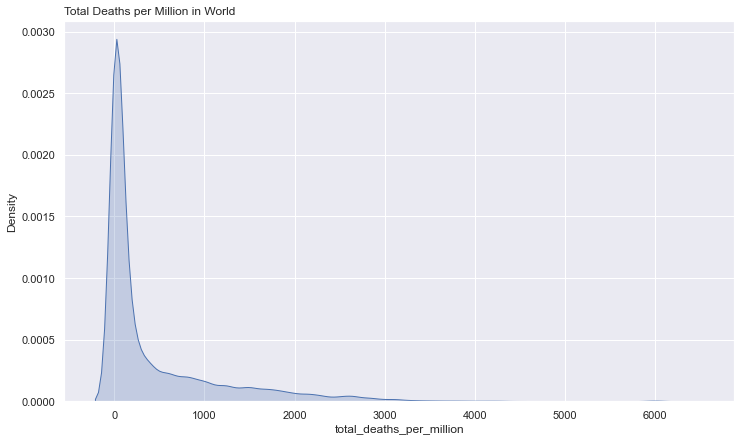

In [234]:
sns.set(style = "darkgrid")
df = dfWorld
 
# density plot with shaded area with kdeplot 'shade' parameter
sns.kdeplot(df['total_deaths_per_million'], shade = True)

# add title
plt.title("Total Deaths per Million in World", loc = "left")

plt.show()

In [151]:
print(dfWorld['total_deaths_per_million'].describe())

count    141130.000000
mean        451.435730
std         767.965459
min           0.000000
25%           7.853000
50%          72.275000
75%         581.969000
max        6322.263000
Name: total_deaths_per_million, dtype: float64


#### 10.3 Density plot - Total Deaths per Million in Europe

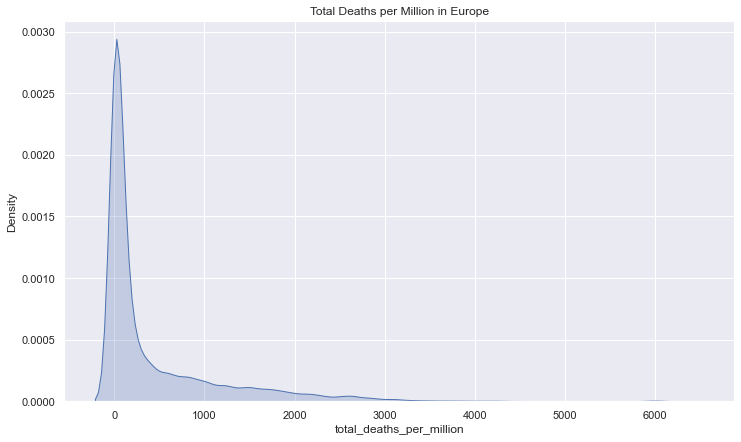

In [152]:
sns.set(style = "darkgrid")
df = dfWorld
 
# density plot with shaded area with kdeplot 'shade' parameter
sns.kdeplot(df['total_deaths_per_million'], shade = True)

# add title
plt.title("Total Deaths per Million in Europe", loc = "center")

plt.show()

In [153]:
print(dfEurope['total_deaths_per_million'].describe())

count    20153.000000
mean      1005.777114
std        962.516654
min          0.000000
25%        111.489000
50%        819.609000
75%       1637.259000
max       5192.517000
Name: total_deaths_per_million, dtype: float64


#### 10.3 Density plot - Total Cases in Portugal

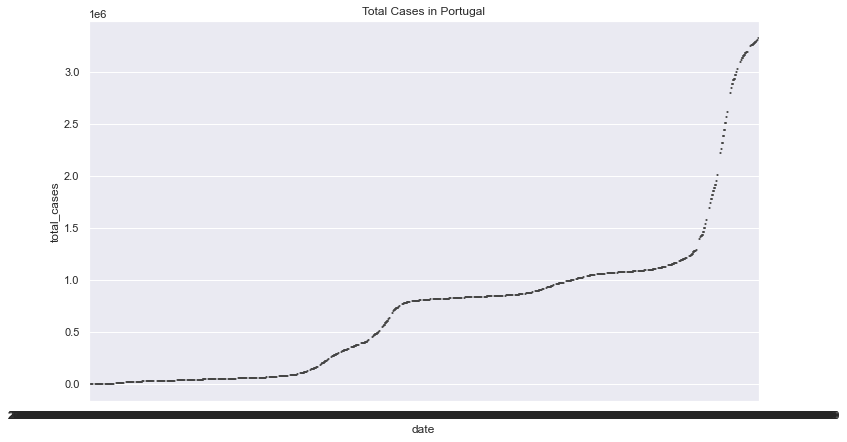

In [229]:
# Usual boxplot
sns.boxplot(x = 'date', y = 'total_cases', data = dfPortugal)

# add title
plt.title("Total Cases in Portugal", loc = "center")

plt.show()

In [155]:
print(dfPortugal['total_cases'].describe())

count    7.350000e+02
mean     7.189387e+05
std      7.285138e+05
min      0.000000e+00
25%      5.812750e+04
50%      8.066260e+05
75%      1.043233e+06
max      3.322134e+06
Name: total_cases, dtype: float64


#### 10.4 Density plot - People Fully Vaccinated per Hundred in Portugal

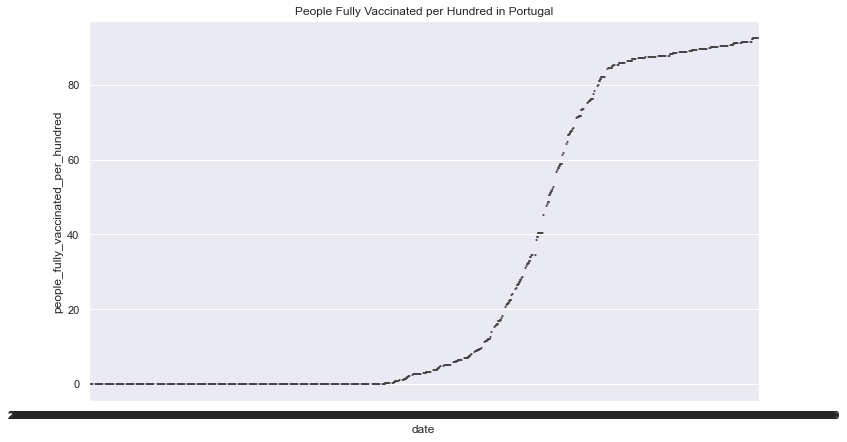

In [156]:
# Usual boxplot
sns.boxplot(x = 'date', y = 'people_fully_vaccinated_per_hundred', data = dfPortugal)

# add title
plt.title("People Fully Vaccinated per Hundred in Portugal", loc = "center")

plt.show()

In [157]:
print(dfPortugal['people_fully_vaccinated_per_hundred'].describe())

count    735.000000
mean      29.331687
std       37.876490
min        0.000000
25%        0.000000
50%        2.890000
75%       76.125000
max       92.540000
Name: people_fully_vaccinated_per_hundred, dtype: float64


#### 10.5 Density plot - Total Cases per Million and Total Deaths per Million in Portugal

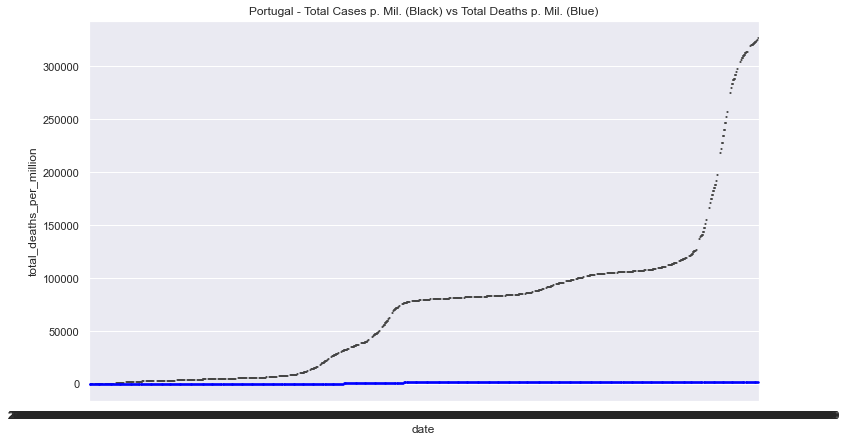

In [239]:
# boxplot
ax = sns.boxplot(x = 'date', y = 'total_cases_per_million', data = dfPortugal)
# add stripplot
ax = sns.stripplot(x = 'date', y = 'total_deaths_per_million', data = dfPortugal, color = "blue", jitter = 0.2, size = 2.5)

# add title
plt.title("Portugal - Total Cases p. Mil. (Black) vs Total Deaths p. Mil. (Blue)", loc = "center")

# show the graph
plt.show()

In [159]:
print('Portugal - total_cases_per_million')
print(dfPortugal['total_cases_per_million'].describe())

Portugal - total_cases_per_million
count       735.000000
mean      70706.547363
std       71648.236616
min           0.000000
25%        5716.752500
50%       79330.459000
75%      102600.403500
max      326726.904000
Name: total_cases_per_million, dtype: float64


In [160]:
print('total_deaths_per_million')
print(dfPortugal['total_deaths_per_million'].describe())

total_deaths_per_million
count     735.000000
mean     1066.101116
std       766.730522
min         0.000000
25%       179.289500
50%      1615.866000
75%      1747.554500
max      2083.218000
Name: total_deaths_per_million, dtype: float64


#### 10.6 Density plot - Total Cases per Million in Europe and Portugal

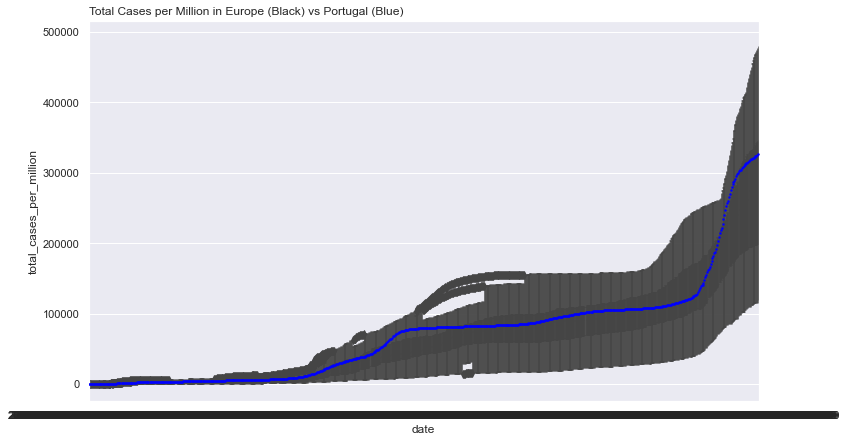

In [161]:
# boxplot
ax = sns.boxplot(x = 'date', y = 'total_cases_per_million', data = dfEurope)
# add stripplot
ax = sns.stripplot(x = 'date', y = 'total_cases_per_million', data = dfPortugal, color = "blue", jitter = 0.2, size = 2.5)

# add title
plt.title("Total Cases per Million in Europe (Black) vs Portugal (Blue)", loc = "left")

# show the graph
plt.show()

In [162]:
print('Europe - total_cases_per_million')
print(dfEurope['total_cases_per_million'].describe())

Europe - total_cases_per_million
count     20153.000000
mean      63152.085770
std       71340.052924
min           0.000000
25%        3615.656000
50%       46065.902000
75%       96100.187000
max      490811.590000
Name: total_cases_per_million, dtype: float64


In [163]:
print('Portugal - total_cases_per_million')
print(dfPortugal['total_cases_per_million'].describe())

Portugal - total_cases_per_million
count       735.000000
mean      70706.547363
std       71648.236616
min           0.000000
25%        5716.752500
50%       79330.459000
75%      102600.403500
max      326726.904000
Name: total_cases_per_million, dtype: float64


#### 10.7 Density plot - Total Cases per Million in World, Europe and Portugal

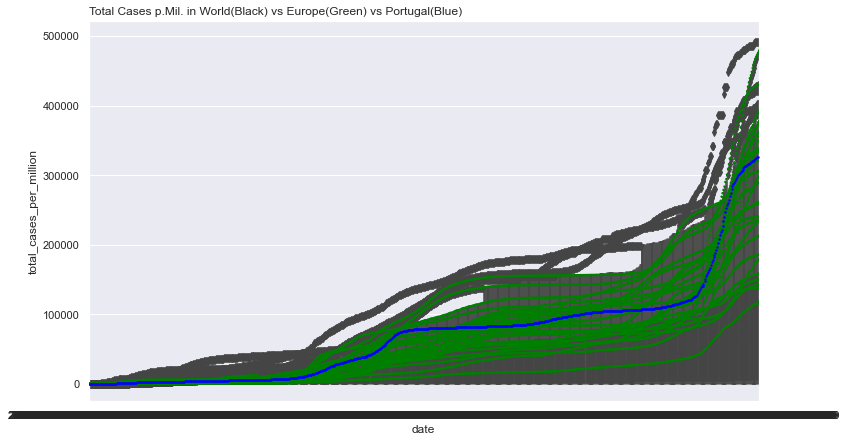

In [164]:
# boxplot
ax = sns.boxplot(x = 'date', y = 'total_cases_per_million', data = dfWorld)
# add stripplot
ax = sns.stripplot(x = 'date', y = 'total_cases_per_million', data = dfEurope, color = "green", jitter = 0.2, size = 2.5)
# add stripplot
ax = sns.stripplot(x = 'date', y = 'total_cases_per_million', data = dfPortugal, color = "blue", jitter = 0.2, size = 2.5)

# add title
plt.title("Total Cases p.Mil. in World(Black) vs Europe(Green) vs Portugal(Blue)", loc = "left")

# show the graph
plt.show()

In [165]:
print('World - total_cases_per_million')
print(dfWorld['total_cases_per_million'].describe())

World - total_cases_per_million
count    141130.000000
mean      28341.368170
std       50641.416283
min           0.000000
25%         513.592500
50%        4188.705000
75%       35525.021000
max      496858.598000
Name: total_cases_per_million, dtype: float64


In [166]:
print('Europe - total_cases_per_million')
print(dfEurope['total_cases_per_million'].describe())

Europe - total_cases_per_million
count     20153.000000
mean      63152.085770
std       71340.052924
min           0.000000
25%        3615.656000
50%       46065.902000
75%       96100.187000
max      490811.590000
Name: total_cases_per_million, dtype: float64


In [167]:
print('Portugal - total_cases_per_million')
print(dfPortugal['total_cases_per_million'].describe())

Portugal - total_cases_per_million
count       735.000000
mean      70706.547363
std       71648.236616
min           0.000000
25%        5716.752500
50%       79330.459000
75%      102600.403500
max      326726.904000
Name: total_cases_per_million, dtype: float64


#### 10.8 Scatter - Life Expectancy vs GDP per Capita PPP in the World

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


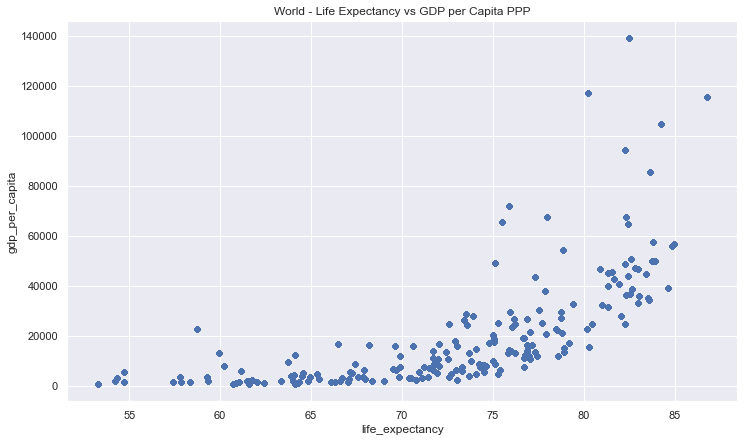

In [168]:
dfWorld.plot(kind='scatter', x='life_expectancy', y='gdp_per_capita',
             title='World - Life Expectancy vs GDP per Capita PPP');

In [169]:
print('World - life_expectancy')
print(dfWorld['life_expectancy'].describe())

World - life_expectancy
count    141130.000000
mean         73.115847
std           7.649380
min          53.280000
25%          67.440000
50%          74.480000
75%          78.730000
max          86.750000
Name: life_expectancy, dtype: float64


In [170]:
print('World - gdp_per_capita')
print(dfWorld['gdp_per_capita'].describe())

World - gdp_per_capita
count    141130.000000
mean      20741.584535
std       23334.161775
min         661.240000
25%        4449.898000
50%       13111.214000
75%       27936.896000
max      139100.000000
Name: gdp_per_capita, dtype: float64


#### 10.9 Distribution - Total Cases per Million in Europe

C:\Users\K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


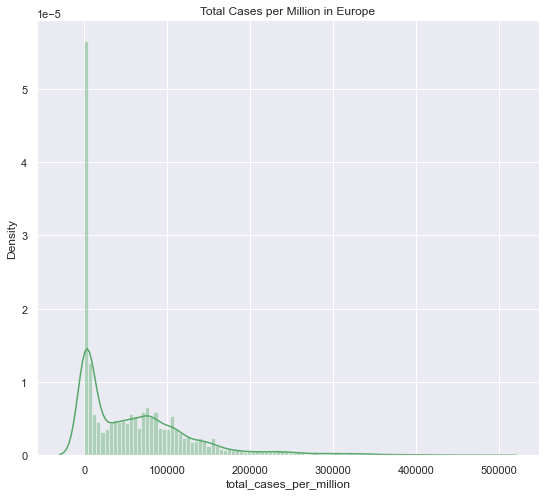

In [171]:
plt.figure(figsize=(9, 8))
sns.distplot(dfEurope['total_cases_per_million'], color='g', bins=100,
             hist_kws={'alpha': 0.4}).set(title='Total Cases per Million in Europe');


In [172]:
print(dfEurope['total_cases_per_million'].describe())

count     20153.000000
mean      63152.085770
std       71340.052924
min           0.000000
25%        3615.656000
50%       46065.902000
75%       96100.187000
max      490811.590000
Name: total_cases_per_million, dtype: float64


#### 10.10 Numerical Data Distribution

In [189]:
# List the numerical data types in the dataset

dfNumDistPT = dfPortugal.select_dtypes(include = ['float64', 'int64'])
dfNumDistPT.head()

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,0.0,0,0.0,0.000,0.0,0.0,0.0,0.0,0,...,9.85,16.3,30,3.39,82.05,0.864,-1942.6,-7.86,-8.18,-191.051801
1,2,0.0,0,0.0,0.197,0.0,0.0,0.0,0.0,0,...,9.85,16.3,30,3.39,82.05,0.864,-1942.6,-7.86,-8.18,-191.051801
2,2,0.0,0,0.0,0.197,0.0,0.0,0.0,0.0,0,...,9.85,16.3,30,3.39,82.05,0.864,-1942.6,-7.86,-8.18,-191.051801
3,5,0.0,0,0.0,0.492,0.0,0.0,0.0,0.0,0,...,9.85,16.3,30,3.39,82.05,0.864,-1942.6,-7.86,-8.18,-191.051801
4,8,0.0,0,0.0,0.787,0.0,0.0,0.0,0.0,0,...,9.85,16.3,30,3.39,82.05,0.864,-1942.6,-7.86,-8.18,-191.051801


In [191]:
# Select the numerical data types to be used
dfNumDistPT1 = dfNumDist[["total_cases", "total_cases_per_million", "excess_mortality_cumulative_absolute"]]

In [192]:
# Confirm that the choosen data types are present
dfNumDistPT1.head()

,total_cases,total_cases_per_million,excess_mortality_cumulative_absolute
0,0,0.000,-1942.6
1,2,0.197,-1942.6
2,2,0.197,-1942.6
3,5,0.492,-1942.6
4,8,0.787,-1942.6


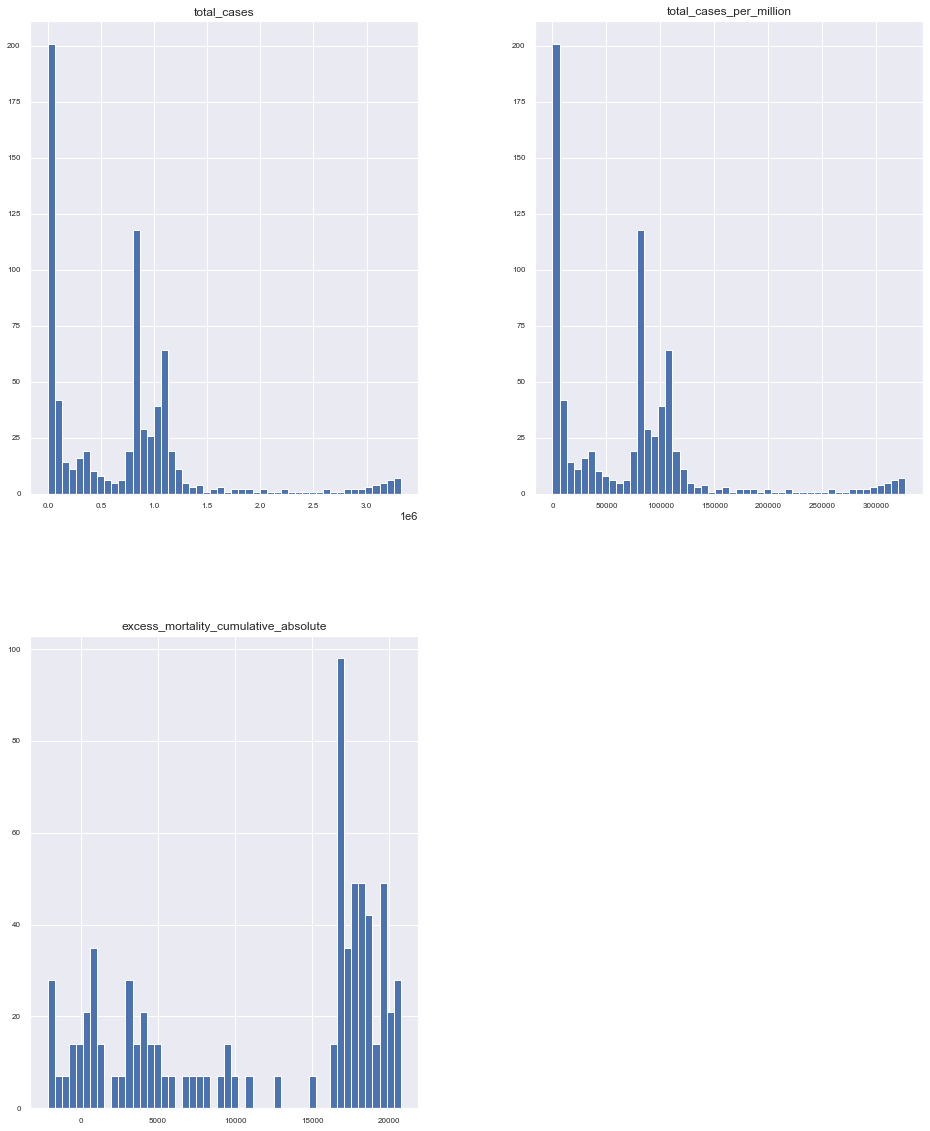

In [193]:
# plot the choosen data types
dfNumDistPT1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

#### 10.11 Correlation testing

In [195]:
# Select the numerical data types to be used
dfCorrelPT1 = dfNumDistPT[['total_vaccinations', 'total_cases', 'total_deaths', 'new_cases_smoothed',
                       'new_deaths_smoothed', 'reproduction_rate', 'total_tests']]

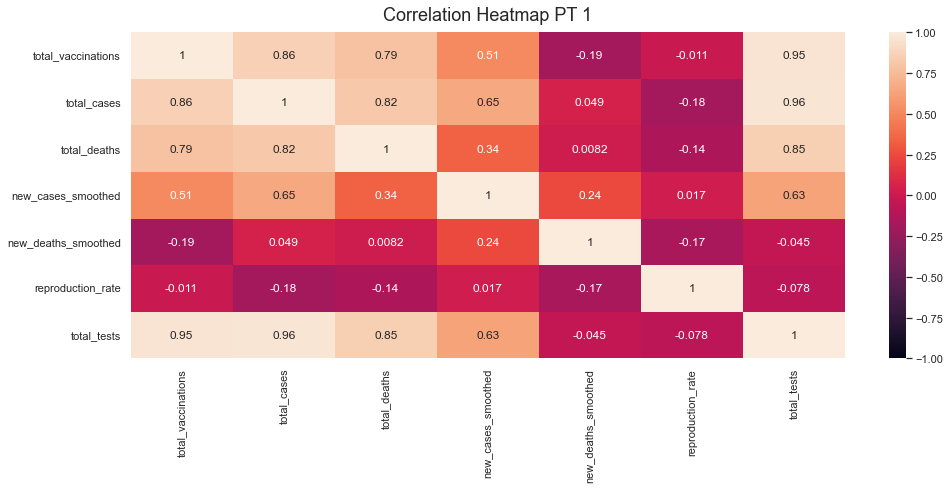

In [196]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfCorrelPT1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap PT 1', fontdict={'fontsize':18}, pad=12);


In [197]:
# Select the numerical data types to be used
dfCorrelPT2 = dfNumDistPT[['people_fully_vaccinated_per_hundred', 'new_deaths_smoothed', 'icu_patients_per_million']]

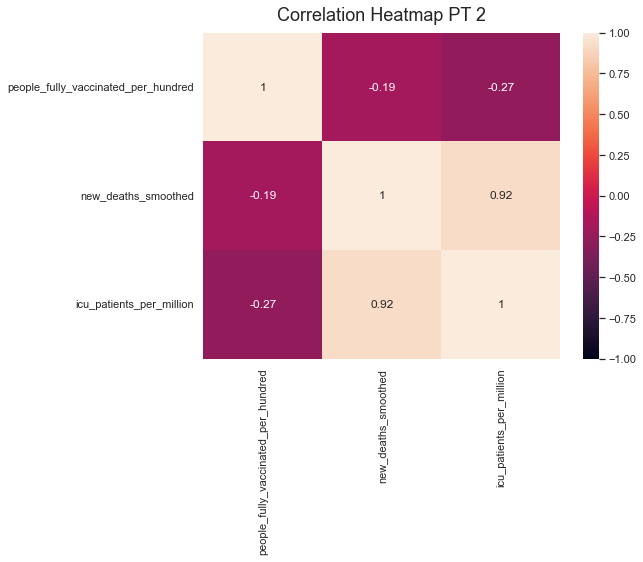

In [198]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(dfCorrelPT2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap PT 2', fontdict={'fontsize':18}, pad=12);


In [200]:
# Select the numerical data types to be used
dfCorrelPT3 = dfNumDistPT[['new_cases_smoothed_per_million', 'people_fully_vaccinated_per_hundred']]

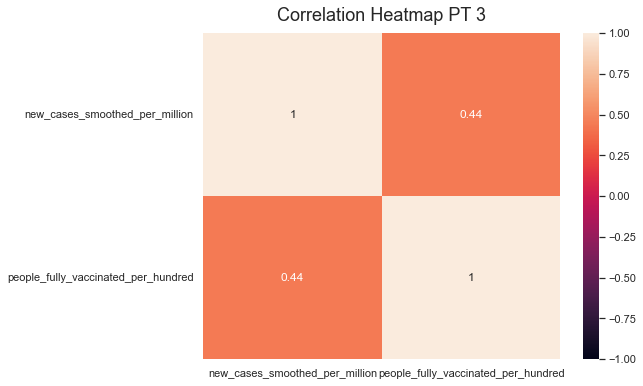

In [201]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(dfCorrelPT3.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap PT 3', fontdict={'fontsize':18}, pad=12);


In [249]:
# List the numerical data types in the dataset

dfNumDistW = dfWorld.select_dtypes(include = ['float64', 'int64'])
dfNumDistW.head()

,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,gdp_per_capita,population,population_density,hospital_beds_per_thousand,life_expectancy
0,5,0.126,0,0.0,1803.987,39835428,54.422,0.5,64.83
1,5,0.126,0,0.0,1803.987,39835428,54.422,0.5,64.83
2,5,0.126,0,0.0,1803.987,39835428,54.422,0.5,64.83
3,5,0.126,0,0.0,1803.987,39835428,54.422,0.5,64.83
4,5,0.126,0,0.0,1803.987,39835428,54.422,0.5,64.83


In [212]:
# Select the numerical data types to be used
dfCorrelW1 = dfNumDistW[['gdp_per_capita', 'life_expectancy', 'total_cases_per_million', 'hospital_beds_per_thousand']]

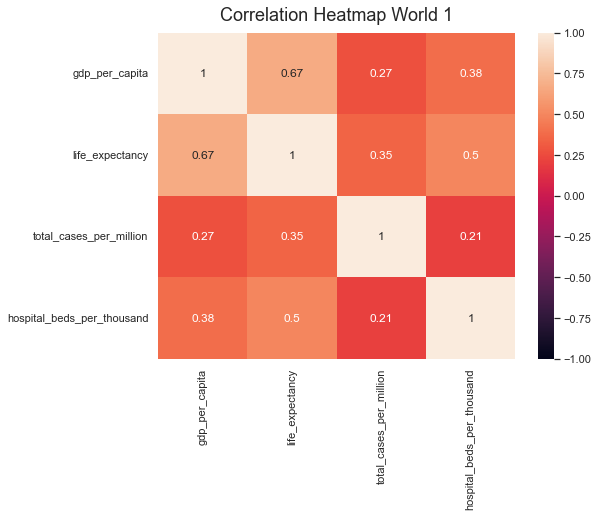

In [213]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(dfCorrelW1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap World 1', fontdict={'fontsize':18}, pad=12);

#### 10.12 Country distribution by continent

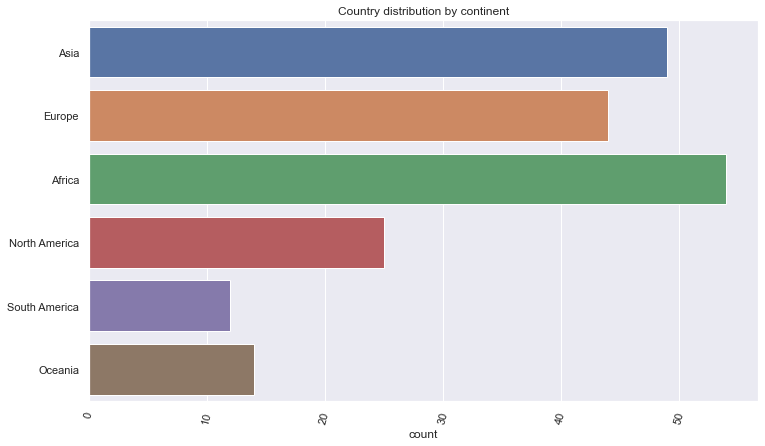

In [248]:
CountDist = dfWorld.groupby(['location','continent'], as_index=False).max('date')

sns.countplot(y=CountDist.continent)
plt.xticks(rotation=75);
plt.title('Country distribution by continent')
plt.ylabel(None);

#### 10.13 Total cases per million distribution by continent

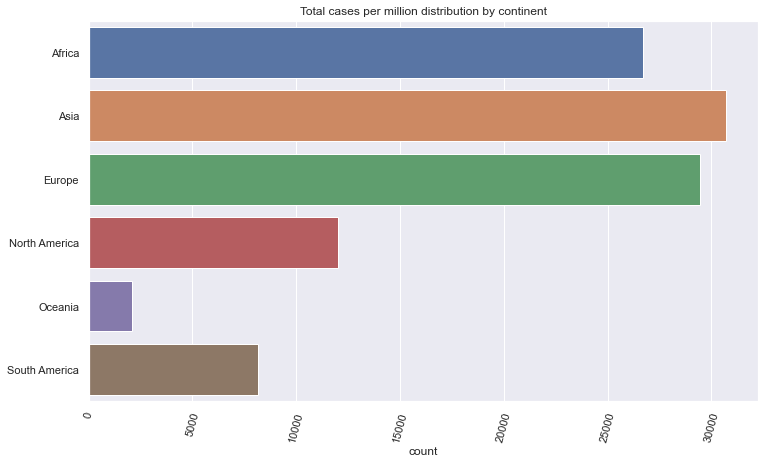

In [264]:
caseDist = dfWorld.groupby(['continent','total_cases_per_million'], as_index=False).max('date')

sns.countplot(y=caseDist.continent)
plt.xticks(rotation=75);
plt.title('Total cases per million distribution by continent')
plt.ylabel(None);

#### 10.14 Total cases and total deaths per million per continent

C:\Users\K\AppData\Local\Temp\ipykernel_28716\2381676353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('total_cases_per_million',ascending=False,inplace=True)


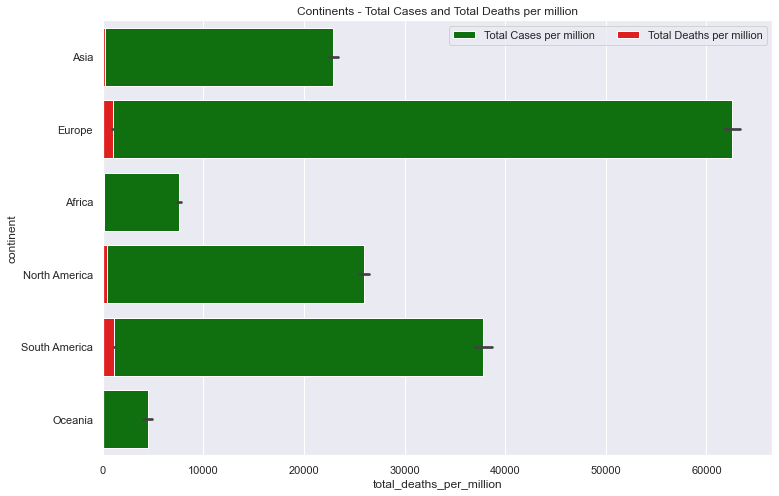

In [263]:
f, ax = plt.subplots(figsize=(12, 8))
data = dfWorld[['continent','total_cases_per_million','total_deaths_per_million']]
data.sort_values('total_cases_per_million',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="total_cases_per_million", y="continent", data=dfWorld,label="Total Cases per million", color="green")

sns.set_color_codes("muted")
sns.barplot(x="total_deaths_per_million", y="continent", data=dfWorld, label="Total Deaths per million", color="red")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_title('Continents - Total Cases and Total Deaths per million');

 #### 10.15 Total cases and total deaths per continent

C:\Users\K\AppData\Local\Temp\ipykernel_28716\1992229055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('total_cases',ascending=False,inplace=True)


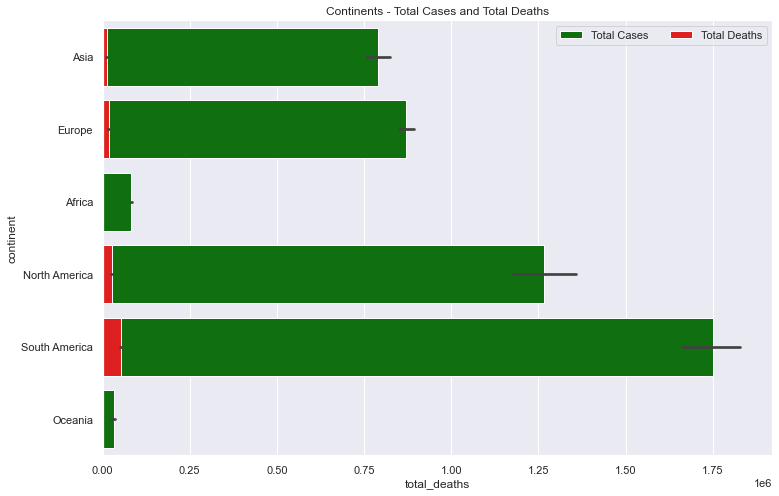

In [265]:
f, ax = plt.subplots(figsize=(12, 8))
data = dfWorld[['continent','total_cases','total_deaths']]
data.sort_values('total_cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="total_cases", y="continent", data=dfWorld,label="Total Cases", color="green")

sns.set_color_codes("muted")
sns.barplot(x="total_deaths", y="continent", data=dfWorld, label="Total Deaths", color="red")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_title('Continents - Total Cases and Total Deaths');

EOF